In [3]:
from dask.distributed import Client
import xarray as xr

In [9]:
client = Client(n_workers=2, threads_per_worker=2, memory_limit='1GB')
client

/opt/conda/lib/python3.7/site-packages/distributed/dashboard/core.py:72: UserWarning: 
Port 8787 is already in use. 
Perhaps you already have a cluster running?
Hosting the diagnostics dashboard on a random port instead.
  warnings.warn("\n" + msg)


Client Scheduler: tcp://127.0.0.1:33214 Dashboard: http://127.0.0.1:33662/status,Cluster Workers: 2 Cores: 4 Memory: 2.00 GB


In [4]:
path1 = '~/shared-cmip6-for-ns1000k/historical/CESM2-WACCM/r1i1p1f1/' +\
'so2_AERmon_CESM2-WACCM_historical_r1i1p1f1_gn_185001-201412.nc'

In [12]:
chunks={
    'time' : 10,  
}

In [14]:
dataset = xr.open_dataset(path1, chunks=chunks, use_cftime = True)

In [15]:
da = dataset['so2'].isel(lev=69).mean(['lat','lon'])

In [16]:
da.to_netcdf('./test.nc')

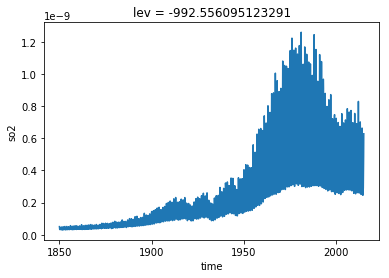

In [19]:
%matplotlib inline
da.plot()